In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sarve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Step 2: Load dataset
df = pd.read_csv('../data/Tweets.csv')  # Ensure this path is correct
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
# Step 3: Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


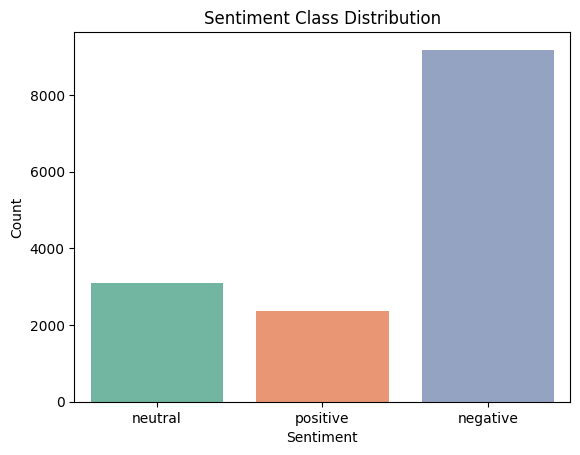

In [4]:
# Step 4: Sentiment class distribution
sns.countplot(data=df, x='airline_sentiment', palette='Set2')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

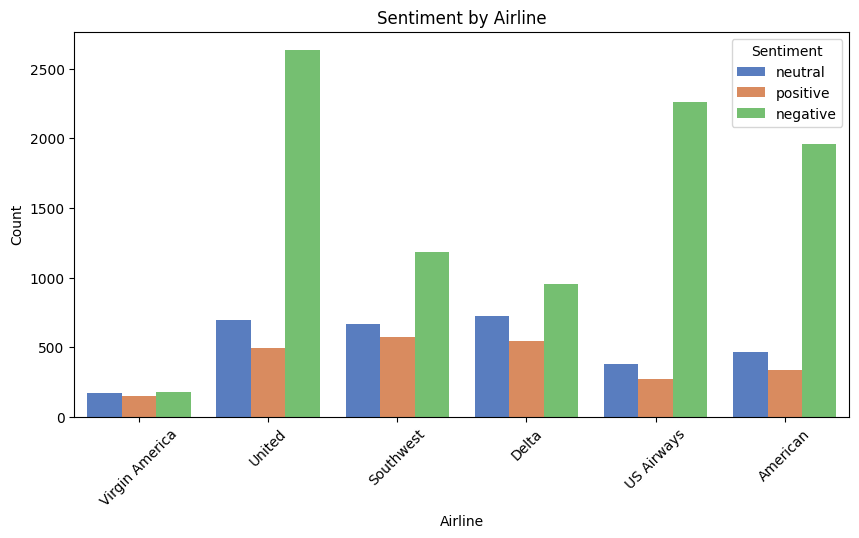

In [5]:
# Step 5: Sentiment distribution by airline
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='airline', hue='airline_sentiment', palette='muted')
plt.title("Sentiment by Airline")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

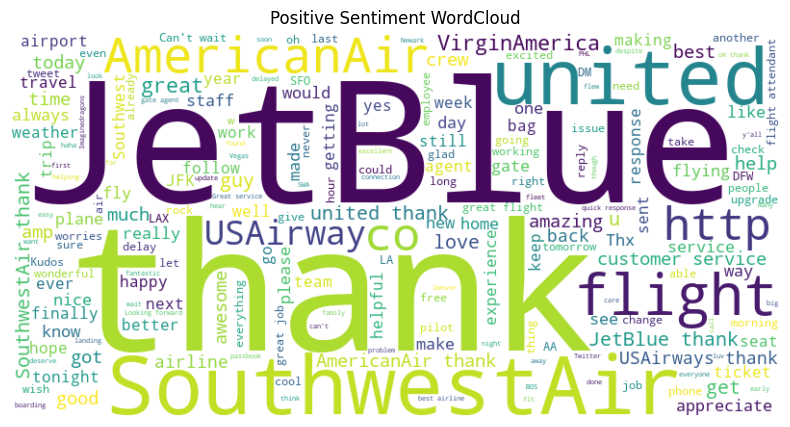

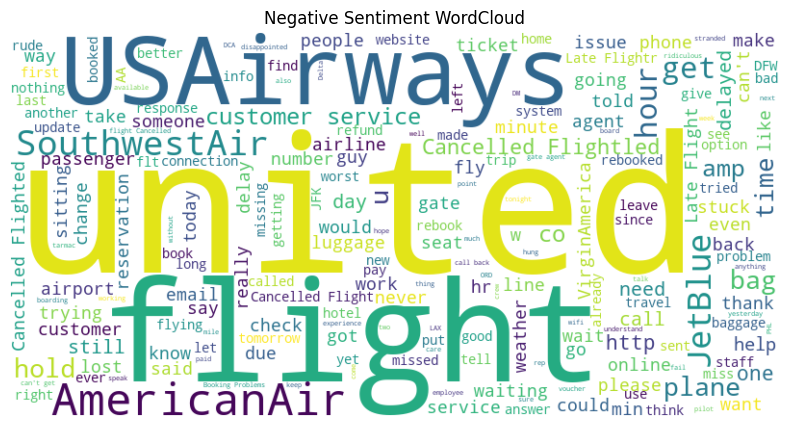

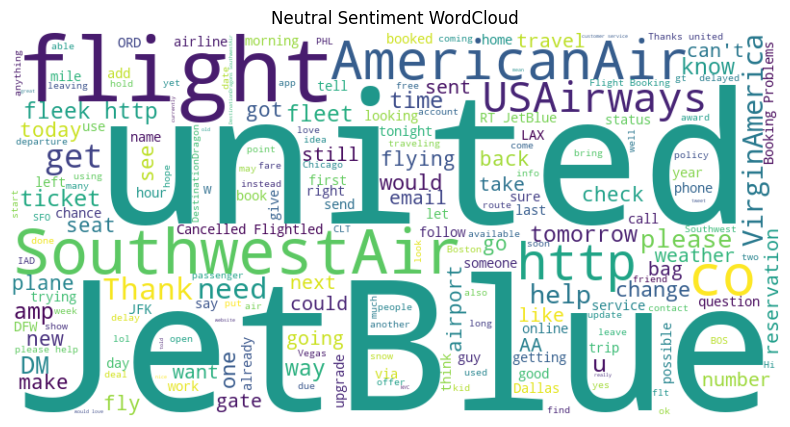

In [6]:
# Step 6: WordClouds for each sentiment
stop_words = set(stopwords.words("english"))

def generate_wordcloud(text_data, title):
    text = " ".join(text_data)
    wordcloud = WordCloud(stopwords=stop_words,
                          background_color="white",
                          max_words=200,
                          width=800,
                          height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Positive WordCloud
generate_wordcloud(df[df['airline_sentiment'] == 'positive']['text'], "Positive Sentiment WordCloud")

# Negative WordCloud
generate_wordcloud(df[df['airline_sentiment'] == 'negative']['text'], "Negative Sentiment WordCloud")

# Neutral WordCloud
generate_wordcloud(df[df['airline_sentiment'] == 'neutral']['text'], "Neutral Sentiment WordCloud")